# PCA

<span>PCA basically take your feature and compress them into lower feature space while spreading the variance in the data across all the remaining components (features). Intially I found the math behind the  PCA a bit confusing, therefore I have included documentation from sklearn documenation page in thes notebook as well. You can find the link to the documentaton below.</span>

Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### Import Preliminaries

In [112]:
%matplotlib inline
%config InlineBackend.figure_format='retina'


# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
import warnings

# Import Model Selection 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (8.0, 7.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [113]:
# Import data 
iris = load_iris()
X = iris.data
y = iris.target

# View dataframe
df = pd.DataFrame(data = X, columns=iris['feature_names'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100,3.500,1.400,0.200
1,4.900,3.000,1.400,0.200
2,4.700,3.200,1.300,0.200
3,4.600,3.100,1.500,0.200
4,5.000,3.600,1.400,0.200


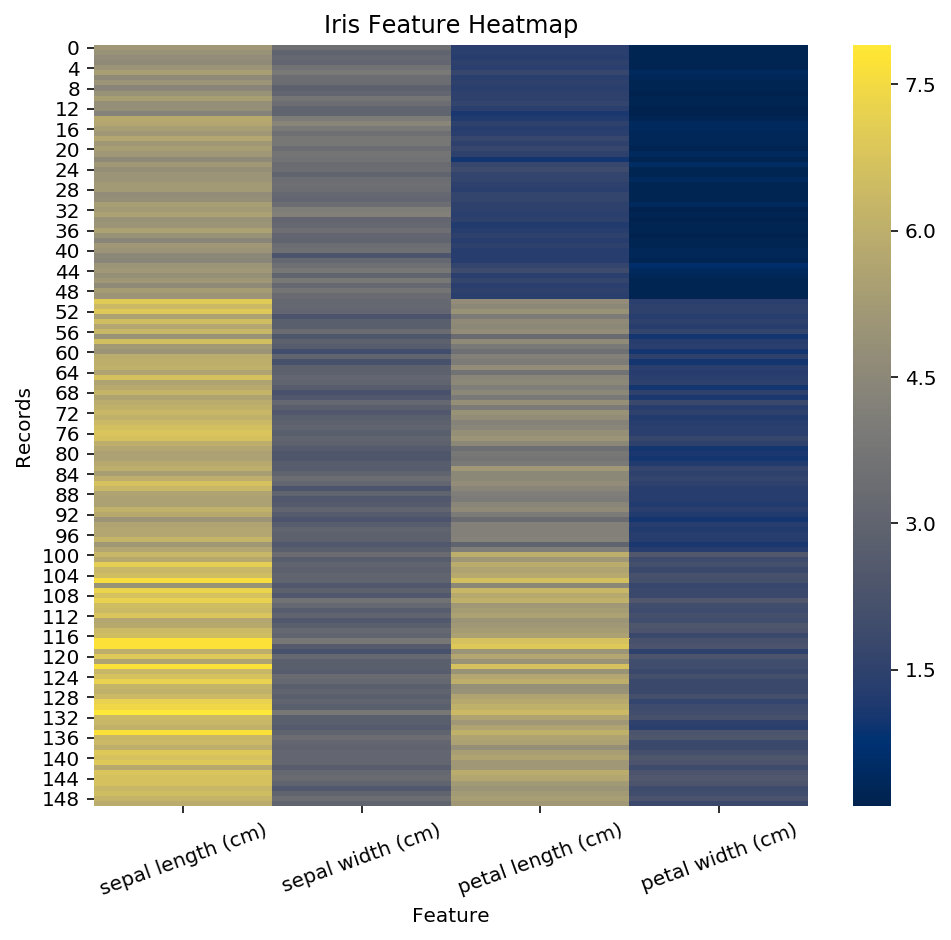

In [114]:
# Plot feature map pre PCA
sns.heatmap(df, cmap='cividis');
plt.title('Iris Feature Heatmap');
plt.xticks(rotation=20)
plt.xlabel('Feature')
plt.ylabel('Records');

### Principal Components Analysis

In [115]:
# Initialize principal component analysis
pca = PCA().fit(X)
pca_train_x = pca.transform(X)
pca_train_x_df = pd.DataFrame(data = pca_train_x, 
                              columns=['component_1','component_2',
                                       'component_3','component_4'])
pca_train_x_df.head(5)

,component_1,component_2,component_3,component_4
0,-2.684,0.327,-0.022,0.001
1,-2.715,-0.170,-0.204,0.100
2,-2.890,-0.137,0.025,0.019
3,-2.746,-0.311,0.038,-0.076
4,-2.729,0.334,0.096,-0.063


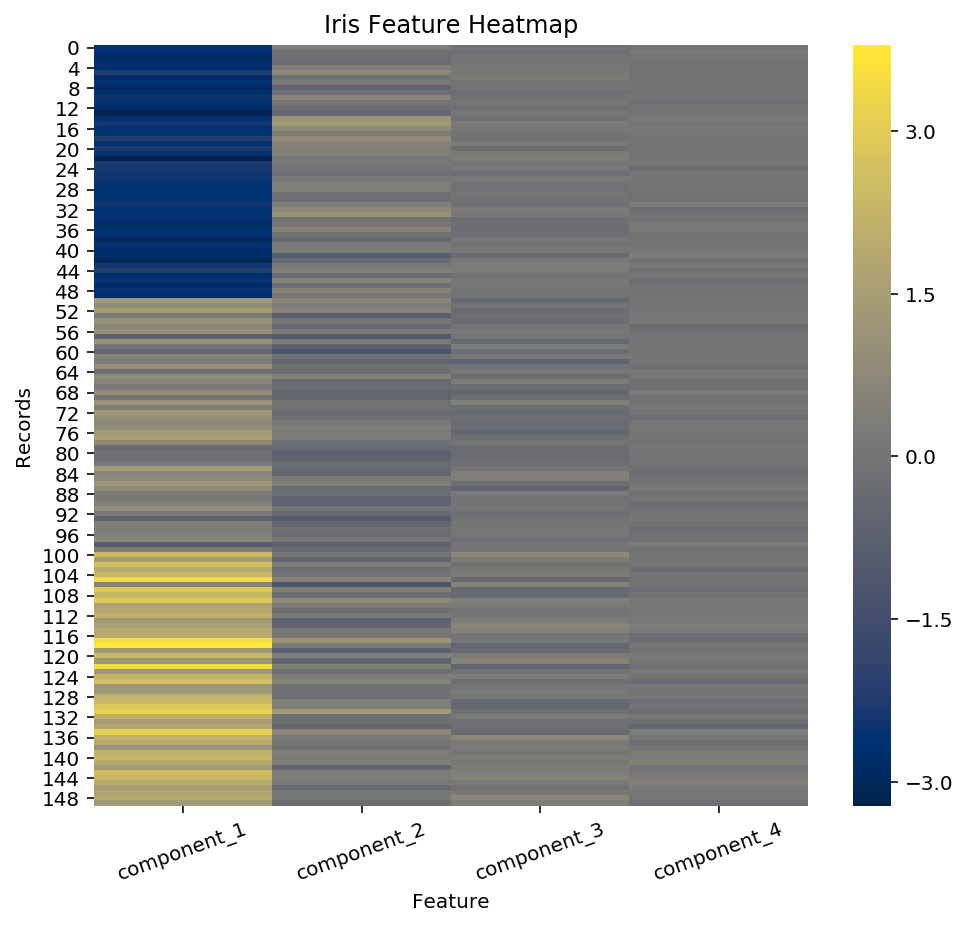

In [116]:
# Plot feature map post PCA
sns.heatmap(pca_train_x_df, cmap='cividis');
plt.title('Iris Feature Heatmap');
plt.xticks(rotation=20)
plt.xlabel('Feature')
plt.ylabel('Records');

In [117]:
# View explained variance ratio
print ('Explained variance by component: %s' %pca.explained_variance_ratio_)

Explained variance by component: [0.92461621 0.05301557 0.01718514 0.00518309]


In [118]:
# View PCA components_
results = pd.DataFrame(pca.components_, columns = iris.feature_names)
results

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.362,-0.082,0.857,0.359
1,0.657,0.730,-0.176,-0.075
2,-0.581,0.596,0.073,0.549
3,0.317,-0.324,-0.480,0.751


Based on documenation by sklearn components_ represents the "principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_."

### Dimension Reduction

In [119]:
# principal component analysis with dimension reduction
pca = PCA(n_components=2).fit(X)
pca_train_x = pca.transform(X)
pca_train_x_df = pd.DataFrame(data = pca_train_x, columns=['component_1','component_2'])
pca_train_x_df.head(5)

,component_1,component_2
0,-2.684,0.327
1,-2.715,-0.170
2,-2.890,-0.137
3,-2.746,-0.311
4,-2.729,0.334


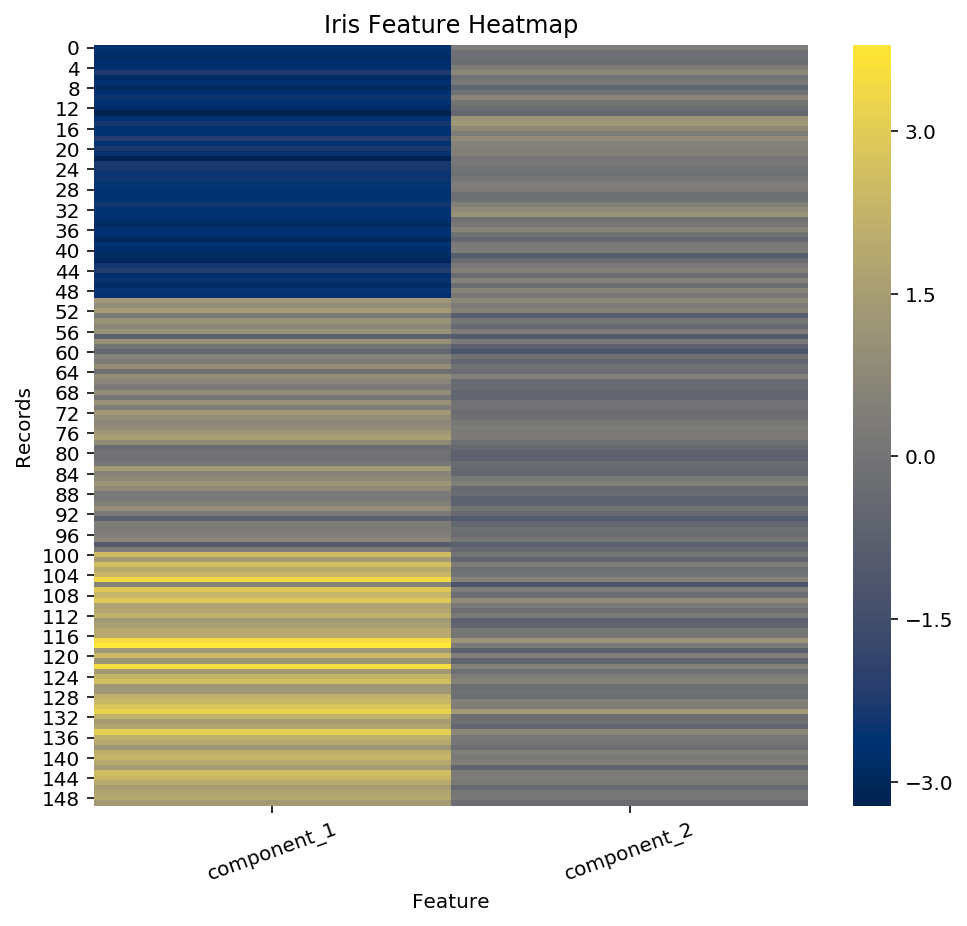

In [120]:
# Plot feature map post dimension reduction
sns.heatmap(pca_train_x_df, cmap='cividis');
plt.title('Iris Feature Heatmap');
plt.xticks(rotation=20)
plt.xlabel('Feature')
plt.ylabel('Records');

In [121]:
# View explained variance ratio
print ('Explained variance by component: %s' %pca.explained_variance_ratio_)

Explained variance by component: [0.92461621 0.05301557]


In [122]:
# View PCA components_
results = pd.DataFrame(pca.components_, columns = iris.feature_names)
results

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.362,-0.082,0.857,0.359
1,0.657,0.730,-0.176,-0.075


### General Notes

- If you conduct PCA on a dataset you lose interpretability in your model
- PCA rotates features that are statistically uncorrelated
- First find the direction of the feature of the maximum variance
- Then find the second feature that is orthogonal to the first feature
- Principal components are list from most importanct to least from left to right (respectively)

Author: Kavi Sekhon